# SD-TSIA-211: Optimization for Machine Learning TP1

### Authors: Gabriele Lorenzo, Aldo Pietromatera

#### Setup:

In [119]:
import random

import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras import layers

#### Importing data:

5


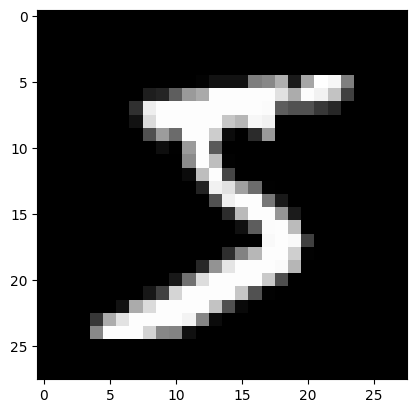

In [120]:
train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")

x_train = train_data[0].reshape(-1, 784).astype(float) / 255
y_train = train_data[1]
x_test = test_data[0].reshape(-1, 784).astype(float) / 255
y_test = test_data[1]

print(y_train[0])
plt.imshow(train_data[0][0], cmap="gray")
plt.show()

#### Creating the model:

In [121]:
# Define the model
inputs = keras.Input(shape=(784,), name="digits")
x1 = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x2 = layers.Dense(32, activation="relu", name="dense_2")(x1)
outputs = layers.Dense(10, activation=None, name="predictions")(x2)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

# Define the loss function
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 26506 (103.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Part 4: Model

### Q.4.1: How many optimization variables are we going to train using this model?

As we can see from the model summary, we have 26506 trainable parameters.

## Part 5: Stochastic gradient descent

### Q.5.1: Reusing the code provided in the basic functions file, implement stochastic gradient descent for the resolution of the neural network model.

In [122]:
def train_model(
    model, loss, x_train, y_train, learning_rate, n_iter, batch_size, epochs
):
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    loss_values = []

    for e in range(epochs):        
        for k in range(n_iter):
            # Select a random vector of samples
            idx = random.sample(range(len(x_train)), batch_size)

            x_train_batch = x_train[idx]
            y_train_batch = y_train[idx]

            with tf.GradientTape() as tape:
                logits = model(x_train_batch, training=True)
                loss_value = loss(y_train_batch, logits)

                if k % 10 == 0:
                    loss_values.append(loss_value.numpy())

            grad = tape.gradient(loss_value, model.trainable_weights)
            optimizer.apply_gradients(zip(grad, model.trainable_weights))

        print(f"Epoch {e + 1}/{epochs} - Loss: {loss_value.numpy()}")

    return loss_values

### Q.5.2: Run it for one pass over the data (also called one epoch) and with a learning rate that satisfies the conditions required by theory. Plot the objective value as a function of the iterations.

Epoch 1/1 - Loss: 2.2255706787109375


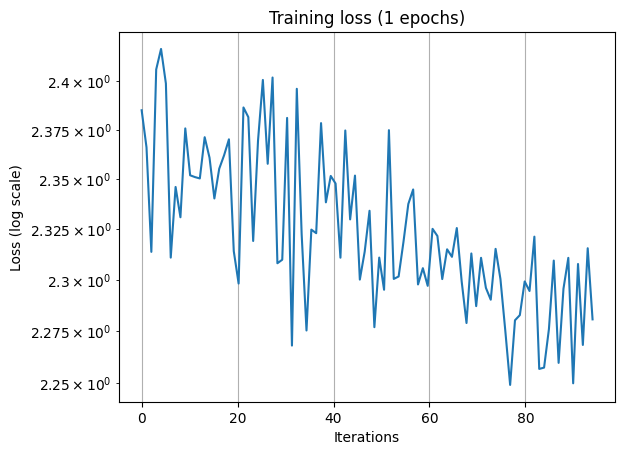

In [123]:
n_samples = x_train.shape[0]
epochs = 1
batch_size = 64
n_iter = n_samples // batch_size
learning_rate = 0.5 / (n_iter * epochs)

loss_values = train_model(
    model, loss, x_train, y_train, learning_rate, n_iter, batch_size, epochs
)

x = np.linspace(0, len(loss_values), len(loss_values))
plt.semilogy(x, loss_values)
plt.xlabel("Iterations")
plt.ylabel("Loss (log scale)")
plt.title("Training loss (1 epochs)")
plt.grid()
plt.show()

## Part 6: Empirical risk minimization

When we want to put more energy on the database we have, we can run the algorithm for more than one epoch. In this case, we consider that we are solving the training problem on a finite sample and we try to minimize the empirical risk.

### Q.6.1: Implement stochastic gradient descent for the resolution of the empirical risk minimization problem and run it for 10 epochs.

Epoch 1/10 - Loss: 2.234445810317993
Epoch 2/10 - Loss: 2.061049461364746
Epoch 3/10 - Loss: 1.9922716617584229
Epoch 4/10 - Loss: 1.806929588317871
Epoch 5/10 - Loss: 1.430878758430481
Epoch 6/10 - Loss: 1.44899582862854
Epoch 7/10 - Loss: 1.2156200408935547
Epoch 8/10 - Loss: 1.0584826469421387
Epoch 9/10 - Loss: 0.769315242767334
Epoch 10/10 - Loss: 0.6771701574325562


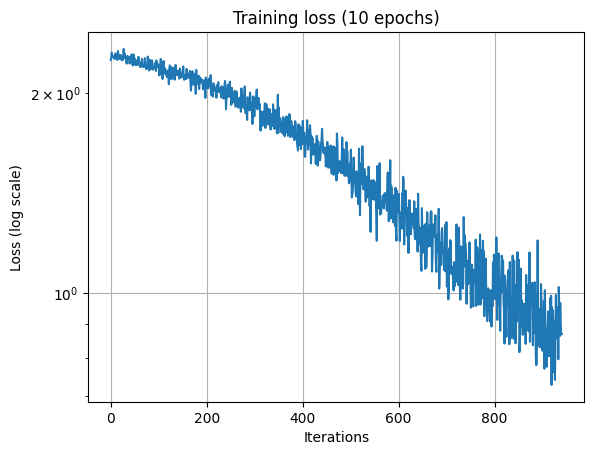

In [124]:
n_samples = x_train.shape[0]
epochs = 10
batch_size = 64
n_iter = n_samples // batch_size
learning_rateing_rateing_rate = 0.5 / (n_iter * epochs)

loss_values = train_model(
    model, loss, x_train, y_train, learning_rate, n_iter, batch_size, epochs
)

x = np.linspace(0, len(loss_values), len(loss_values))
plt.semilogy(x, loss_values)
plt.xlabel("Iterations")
plt.ylabel("Loss (log scale)")
plt.title("Training loss (10 epochs)")
plt.grid()
plt.show()

### Q.6.2: Sometimes practicioners select several samples at each iteration (this is called a batch of samples) and they average them. According to you, what is the advantage of such a scheme?

Using batches instead of the whole dataset for training a neural network offers several advantages:

1. **Efficient Memory Usage**: When working with large datasets, loading the entire dataset into memory may not be feasible due to memory constraints. By using batches, you can process a subset of the data at a time, allowing you to train models on datasets that wouldn't fit entirely into memory.

2. **Faster Computation**: Processing smaller batches of data in parallel can leverage the computational power of modern hardware such as GPUs and TPUs more effectively. This parallelization speeds up the training process compared to sequentially processing the entire dataset.

3. **Stochastic Gradient Descent (SGD)**: Using batches is inherent to SGD, which updates the model's parameters after processing each batch. SGD with mini-batches tends to converge faster than batch gradient descent because it updates the model more frequently.

4. **Generalization**: Training on batches allows the model to learn from a diverse set of examples in each iteration. This can help the model generalize better to unseen data compared to training on the entire dataset at once, which may lead to overfitting.

5. **Dynamic Learning**: Batch-based training allows for dynamic adjustment of learning rates and other hyperparameters during training. This adaptability can lead to faster convergence and better model performance.

6. **Ease of Implementation**: Implementing batch training is straightforward and supported by most deep learning frameworks. It involves dividing the dataset into batches and iterating over them during the training process.

### Q.6.3: Add the option of the batch size to your algorithm.

Our implementation already supports the batch size as a parameter.

## Part 7: Evaluation of the model

### Q.7.1: Evaluate the accuracy of the model on the training set and on the test set.

In [125]:
def evaluate_model(model, x, y, n_samples=1000):
    idx = random.sample(range(len(x)), n_samples)
    logits = model(x[idx], training=False)

    loss_model = loss(y[idx], logits).numpy()
    accuracy = np.mean(np.argmax(logits, axis=1) == y[idx])

    return loss_model, accuracy

In [126]:
n_samples = x_train.shape[0]
epochs = 1
batch_size = 64
n_iter = n_samples // batch_size
learning_rate = 0.5 / (n_iter * epochs)

loss_values = train_model(
    model, loss, x_train, y_train, learning_rate, n_iter, batch_size, epochs
)
loss_train, accuracy_train = evaluate_model(model, x_train, y_train, n_samples=1000)

print(f"Train - Loss: {loss_train} - Accuracy: {accuracy_train}")

Epoch 1/1 - Loss: 0.811713695526123
Train - Loss: 0.7776868939399719 - Accuracy: 0.827


In [127]:
# Training set
loss_train, accuracy_train = evaluate_model(model, x_train, y_train, n_samples=1000)

# Testing set
loss_test, accuracy_test = evaluate_model(model, x_test, y_test, n_samples=1000)

print(f"Train - Loss: {loss_train} - Accuracy: {accuracy_train}")
print(f"Test - Loss: {loss_test} - Accuracy: {accuracy_test}")

Train - Loss: 0.7635455131530762 - Accuracy: 0.799
Test - Loss: 0.7656755447387695 - Accuracy: 0.817
